In [1]:
import simpy
import random
import matplotlib.pyplot as plt

In [2]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VACUNAS = 57
# Total de numero de mesas para vacunacion
NUM_MESAS = 3
PACIENTES = 400
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 480 #Minutos = 8 horas
INTERVALO = 10

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionario para el numero de pacientes que han sido atendidos
p_vacunado =[]
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

In [3]:
class Centro(object):
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre

    #Proceso de control, para toma de signos vitales y valida estar dentro del padron
    def control(self, paciente):
        t_con = random.randint(2,5) #Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunacion(self, paciente):
        t_vacunacion = random.randint(5,10) #Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    #Traslado para la salida del paciente
    def salida(self,paciente):
        t_salida = random.randint(1,3) #Finalmente llevados a la salida entre (1-3 minutos).
        yield self.env.timeout(t_salida)

In [4]:
def llegada(env, nombre, centro):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with centro.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del paciente
        yield env.process(centro.control(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            p_no_vacunado.append(nombre)
        else:
            # Indicamos que paciente ingresa a la mesa de vacunacion
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            
            # Se realiza la vacunacion
            yield env.process(centro.vacunacion(nombre))
            # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            p_vacunado.append(nombre)
            
        yield env.process(centro.salida(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))

In [5]:
def ejecucion(env, num_mesas, pacientes, intervalo):
    centro = Centro(env,num_mesas,"Coliseo UPS")
    for i in range(pacientes):
        env.process(llegada(env,'Paciente-%d'%(i+1), centro))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(llegada(env,'Paciente-%d'%(i+1), centro))

In [6]:

# Creamos el entorno de simulacion
env=simpy.Environment()
print("pacientes ", PACIENTES)
env.process(ejecucion(env, NUM_MESAS, PACIENTES, INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

pacientes  400
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Paciente-21 a la hora 0.00.
Llega e

Se traslada el paciente: Paciente-108 a la hora 320.00.
Se traslada el paciente: Paciente-109 a la hora 320.00.
Llega el paciente: Paciente-435 a la hora 322.00.
Paciente  105
Paciente [Paciente-105] vacunado a las 322.00.
Sintomas:  2
Ingresa el paciente a las Paciente-108 a la hora 323.00.
Tiempo tomado:  9  para paciente:  Paciente-108
Sintomas:  1
Paciente [Paciente-105] trasladado a la salida a las 325.00.
Se traslada el paciente: Paciente-110 a la hora 325.00.
Paciente [Paciente-109] trasladado a la salida a las 326.00.
Se traslada el paciente: Paciente-111 a la hora 326.00.
Sintomas:  2
Ingresa el paciente a las Paciente-110 a la hora 330.00.
Tiempo tomado:  5  para paciente:  Paciente-110
Sintomas:  1
Paciente  108
Paciente [Paciente-108] vacunado a las 332.00.
Paciente [Paciente-111] trasladado a la salida a las 333.00.
Se traslada el paciente: Paciente-112 a la hora 333.00.
Llega el paciente: Paciente-436 a la hora 334.00.
Paciente [Paciente-108] trasladado a la salida a las 

[(1, 10), (5, 7), (6, 7), (9, 9), (13, 8), (14, 10), (18, 7), (20, 10), (21, 10), (26, 7), (29, 8), (32, 10), (33, 7), (34, 10), (35, 7), (41, 6), (44, 10), (47, 5), (48, 9), (51, 6), (53, 5), (54, 8), (55, 8), (57, 8), (61, 8), (64, 5), (65, 7), (69, 10), (70, 8), (71, 8), (77, 7), (79, 10), (81, 5), (82, 6), (83, 10), (86, 7), (87, 8), (88, 7), (90, 5), (91, 9), (92, 9), (96, 9), (100, 6), (101, 6), (102, 6), (103, 9), (105, 10), (106, 5), (108, 9), (110, 5), (115, 8), (119, 5), (120, 7), (122, 10), (124, 6), (126, 9), (128, 6), (130, 8), (131, 10), (133, 8), (134, 7), (135, 9), (138, 8), (140, 7), (142, 7), (151, 10), (154, 6), (155, 6), (156, 6), (157, 10)]


Text(0.5, 0, 'Tiempo tomado')

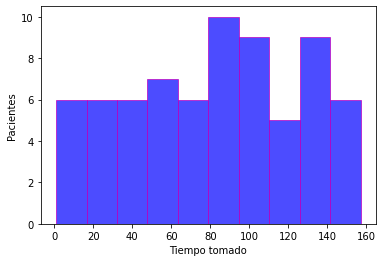

In [7]:
# Generamos la grafica
datos = sorted(tiempo_vacunacion.items())
print(datos)
x, y = zip(*datos)
result = plt.hist(x,color='blue',edgecolor='m',alpha=0.7)
plt.ylabel("Pacientes")
plt.xlabel("Tiempo tomado")

In [8]:

suma = 0
for val in tuple(tiempo_vacunacion.values()):
    suma = suma+val
print("Promedio de tiempo vacunacion",suma/len(tiempo_vacunacion))

Promedio de tiempo vacunacion 7.7


In [9]:
print("Total de pacientes que llegaron ",PACIENTES)
print("Vacunados ", len(p_vacunado))
print("No vacunados ", len(p_no_vacunado))
n_atendidos = PACIENTES-(len(p_vacunado)+len(p_no_vacunado))
print("Pacientes no atendidos",n_atendidos)

Total de pacientes que llegaron  400
Vacunados  70
No vacunados  87
Pacientes no atendidos 243
